## LumA - Feature Selection

In [18]:
import numpy as np
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (25.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Make the notebook automatically reload external python modules
%load_ext autoreload
%autoreload 2
# Ignore warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import time
import sys

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Part 1: Data Preprocessing

In [2]:
# Read comma separated data
data = pd.read_csv('data/SCANB.csv', index_col=False)
data_target = pd.read_csv('data/sampleinfo_SCANB_t.csv')
data = data.set_index('Unnamed: 0').T

#### Adding the target column to the dataframe and drop missing data

In [3]:
data['isLumA'] = 0
data = data.dropna(axis=1)
data

Unnamed: 0,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,isLumA
F1,-3.321928,4.911099,-3.321928,-3.321928,-0.539253,0.598115,-1.352525,-3.213583,6.172477,-1.584899,...,3.044573,1.640598,2.425306,3.244432,-0.411950,1.468899,6.281767,1.774107,2.437227,0
F2,-3.321928,-3.321928,-3.321928,-3.321928,-0.576620,2.363673,-0.779430,-3.054421,7.113514,-2.329463,...,2.743902,0.684370,1.861781,2.727427,-0.452902,1.924761,7.169613,1.764214,2.876100,0
F3,-3.321928,-3.321928,-3.321928,-3.321928,-1.651323,2.647738,0.085410,-3.321928,5.641996,-2.221576,...,4.719843,-0.160076,1.365396,3.122333,0.594147,1.619277,6.683400,2.039246,2.929346,0
F4,-3.321928,3.656393,-3.321928,-3.321928,0.126633,1.378576,-0.334324,-3.321928,7.236769,-1.412293,...,4.157466,1.036271,2.038984,3.182823,-0.046619,1.969433,6.666306,2.771650,2.777674,0
F5,-3.321928,4.190104,-3.321928,-3.321928,0.783715,2.759643,0.984849,-3.321928,7.508171,-0.135133,...,1.024820,1.147535,2.032704,3.588842,0.808823,2.998474,6.479006,2.696269,3.957146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
F2912repl,-3.321928,-3.321928,-3.321928,-3.321928,-3.321928,2.430733,1.018666,-3.321928,6.882498,-1.911554,...,3.239924,0.516923,2.425054,3.074247,-1.070585,2.391182,6.167490,2.196925,3.182132,0
F2958repl,-3.321928,4.627216,-3.321928,-3.321928,-1.114219,2.097562,0.542301,-2.928133,6.972296,-1.581553,...,4.389831,0.127864,1.790839,2.953123,0.586012,2.082903,5.940774,2.351836,3.510877,0
F3057repl,-3.321928,6.965451,-3.321928,-3.321928,1.651384,1.418644,0.064947,-3.043577,8.223603,-1.267660,...,2.047489,0.952073,2.346690,3.476365,1.122679,3.046818,6.511327,3.383714,4.262995,0
F3085repl,-3.321928,4.531984,-3.321928,-3.321928,-0.594062,3.437225,0.149748,-3.160701,4.870941,-0.483202,...,4.393794,1.501286,2.705467,3.148965,-0.320549,2.185147,4.671022,1.636199,2.771947,0


In [4]:
data_target

,Unnamed: 0,samplename,ER,PAM50,time,event,Lympho,cluster2
0,1,F1,1,Basal,2367,0,2.602223,6
1,2,F2,2,LumA,2367,0,1.104544,5
2,3,F3,2,LumB,2168,1,0.581018,5
3,4,F4,2,LumA,2416,0,2.882004,6
4,5,F5,2,Normal,2389,0,1.013356,4
...,...,...,...,...,...,...,...,...
3064,3065,F2912repl,2,LumA,490,1,0.169352,5
3065,3066,F2958repl,2,Her2,1502,0,1.970687,6
3066,3067,F3057repl,2,LumA,1473,0,1.030736,4
3067,3068,F3085repl,2,LumB,1426,0,0.685621,5


#### Add the LumA information in the 'Target' column. We classify LumA = 1 and ~LumA = 0

In [6]:
for index in range(data_target.shape[0]):
    if data_target['PAM50'][index] == "LumA":
        data['isLumA'][index] = 1

data.head(10)

C:\Users\shlom\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Unnamed: 0,5_8S_rRNA,5S_rRNA,6M1-18,7M1-2,7SK,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,isLumA
F1,-3.321928,4.911099,-3.321928,-3.321928,-0.539253,0.598115,-1.352525,-3.213583,6.172477,-1.584899,...,3.044573,1.640598,2.425306,3.244432,-0.411950,1.468899,6.281767,1.774107,2.437227,0
F2,-3.321928,-3.321928,-3.321928,-3.321928,-0.576620,2.363673,-0.779430,-3.054421,7.113514,-2.329463,...,2.743902,0.684370,1.861781,2.727427,-0.452902,1.924761,7.169613,1.764214,2.876100,1
F3,-3.321928,-3.321928,-3.321928,-3.321928,-1.651323,2.647738,0.085410,-3.321928,5.641996,-2.221576,...,4.719843,-0.160076,1.365396,3.122333,0.594147,1.619277,6.683400,2.039246,2.929346,0
F4,-3.321928,3.656393,-3.321928,-3.321928,0.126633,1.378576,-0.334324,-3.321928,7.236769,-1.412293,...,4.157466,1.036271,2.038984,3.182823,-0.046619,1.969433,6.666306,2.771650,2.777674,1
F5,-3.321928,4.190104,-3.321928,-3.321928,0.783715,2.759643,0.984849,-3.321928,7.508171,-0.135133,...,1.024820,1.147535,2.032704,3.588842,0.808823,2.998474,6.479006,2.696269,3.957146,0
F6,-3.321928,2.556304,-3.321928,-3.321928,-1.759556,2.287331,0.055967,-3.240256,9.701680,-0.588587,...,3.096097,-0.054906,0.985107,3.054852,-0.045820,2.318660,7.711859,2.905767,3.892004,0
F9,-3.321928,-3.321928,-3.321928,-3.321928,0.494308,3.082967,0.083236,-3.266724,6.697515,-1.938000,...,2.424017,0.202236,1.353414,2.859130,0.718388,2.485166,6.256384,1.711416,3.344201,0
F10,-3.321928,3.223401,-3.321928,-3.321928,0.749841,2.391895,-0.512592,-3.194633,7.306434,-1.395287,...,2.752725,0.398657,1.773916,2.756937,-1.161449,1.816193,6.772483,2.195755,2.201702,1
F11,-3.321928,-3.321928,-3.321928,-3.321928,1.541830,1.953536,0.175489,-3.150456,7.518080,-1.048490,...,2.777566,0.458749,1.600170,3.293035,-1.442078,2.568569,6.222401,2.634517,3.384362,1
F12,-3.321928,5.265988,-3.321928,-3.321928,0.049312,3.831761,0.135180,-3.068973,5.808893,-1.740476,...,3.936359,0.418557,1.765641,3.477728,-0.066979,2.167204,5.761246,2.071037,3.082507,0


### Data Visualisation:

[1529 1540]


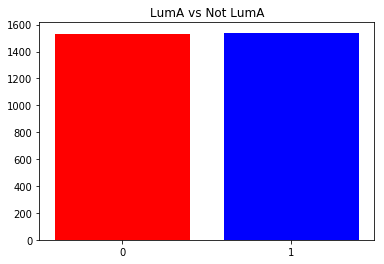

In [6]:
t = data['isLumA']
values, counts = np.unique(t, return_counts=True)
print(counts)
plt.bar(x=values,height=counts, color=["Red", "Blue"])
plt.xticks([0,1])
plt.title("LumA vs Not LumA")
plt.show()

#### We can see that the data is almost split in half.

## Part 2: Building the Model

In [7]:
X = data.drop('isLumA', axis=1).values
y = data['isLumA'].values
X.shape, y.shape

((3069, 30865), (3069,))

Split the data into 80% train and 20% train:

In [8]:
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]
print("X_train shape:",X_train.shape ,"y_train shape:",y_train.shape)
print("X_val shape:",X_val.shape ,"y_val shape:",y_val.shape)

X_train shape: (2455, 30865) y_train shape: (2455,)
X_val shape: (614, 30865) y_val shape: (614,)


Fitting the Model:

Regularization happens as default in order to overcome this, we set C as large as you possible. Also, make sure to use l2 since l1 with that implementation can be painfully slow.

In [9]:
#lr = LogisticRegression(penalty='none',solver='newton-cg',random_state=0).fit(X_train, y_train)
lr = LogisticRegression(C=sys.maxsize,random_state=0).fit(X_train, y_train)

Checking the accuracy of the model, using the validation sets

In [10]:
y_pred = lr.predict(X_val)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_val, y_val)))

Accuracy of logistic regression classifier on test set: 0.89


We plot the confusion matrix along with its classification report.

In [11]:
con_matrix = sklearn.metrics.confusion_matrix(y_val, y_pred)
print("Confusion Matrix:")
print(con_matrix, "\n")
print("Classification Report:")
print(classification_report(y_val, y_pred))

Confusion Matrix:
[[264  32]
 [ 38 280]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       296
           1       0.90      0.88      0.89       318

   micro avg       0.89      0.89      0.89       614
   macro avg       0.89      0.89      0.89       614
weighted avg       0.89      0.89      0.89       614



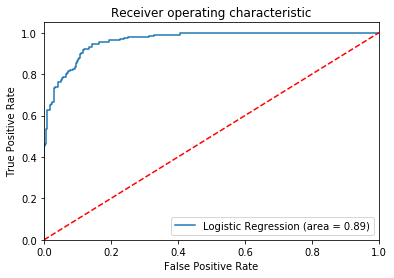

In [12]:
logit_roc_auc = roc_auc_score(y_val, lr.predict(X_val))
fpr, tpr, thresholds = roc_curve(y_val, lr.predict_proba(X_val)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Part 3: Feature Selection - Forward Selection:

Running Logistic Regression on the data using all features yields as a maximum accuracy of 0.89. We will now apply Forward selection and try and get a subset of around 100 features whom will yeild roughly the same accuracy threshold.

In [7]:
def forward_selection_single_threaded(data, X_train, y_train, X_val, y_val, max_features, C_param=1):
    # Getting all the features and remembering to remove the isLumA column
    features = [i for i in range(data.shape[1]-1)]
    selected_features = []
    selected_features_by_name = []
    highest_accu = 0
    best_feature = None
    selected_features_dict = []
    # Keeping track of time, to moniter how long it takes for each iteration
    
    for i in range(max_features):
        start = time.time()
        best_feature = None
        highest_accu = 0
        
        for feature in features:
            # decide on which features we are using (selected_features + feature)
            features_in_use = selected_features + [feature]
            #print(features_in_use, int(feature))
            X_train_filt = X_train[:,features_in_use]
            X_val_filt = X_val[:,features_in_use]
     
            # Fit a Logistic regression model
            lr = LogisticRegression(C=C_param,random_state=0).fit(X_train_filt, y_train)
            # Get the accuracy rate using the validation set
            accu_train = lr.score(X_train_filt, y_train)
            # Storing the best feature according to the highest accuracy rate.
            if accu_train > highest_accu:
                highest_accu = accu_train
                best_feature = feature
       
        # Add the best feature to the list
        selected_features.append(best_feature)
        selected_features_by_name.append(data.columns[best_feature])
        # Train the model again with these features
        X_train_filt = X_train[:,selected_features]
        X_val_filt = X_val[:,selected_features]
        lr = LogisticRegression(C=C_param,random_state=0).fit(X_train_filt, y_train)
        # Measure Validation accuracy with the features
        accu_val = lr.score(X_val_filt, y_val)
        # Remove the feature found from the list of features
        features.remove(best_feature)
        
        # Measure time
        times = time.time()-start
        # Populate dictionary of info and add it to our list and continue
        selected_features_dict.append({"Feature": selected_features_by_name.copy(),"Iteration": i+1, 
                                       "Training accuracy": highest_accu, "Validation Accuracy": accu_val, "Time":times})
    #print(selected_features,selected_features_by_name, highest_accu)
    # return a dictionary
    return (selected_features_dict, highest_accu);

Splitting the data into training and testing and running forward selection to get a list of features

In [9]:
from LumA_Functions import *

In [12]:
#%%time
# Organize the data into np arrays
X = data.drop('isLumA', axis=1).values
y = data['isLumA'].values
# Split into training and validation sets
np.random.seed(42)
indices = np.random.permutation(X.shape[0])
idx_train, idx_val = indices[:int(0.8*X.shape[0])], indices[int(0.8*X.shape[0]):]
X_train, X_val = X[idx_train], X[idx_val]
y_train, y_val = y[idx_train], y[idx_val]

In [13]:
# Run forward selection
max_features = 5
# Run with threadPool and single thread
features_found_10,accu_acheived_10 = forward_selection(data,X_train, y_train, X_val, y_val, max_features, 10)
features_found_20,accu_acheived_20 = forward_selection(data,X_train, y_train, X_val, y_val, max_features, 20)
features_found_single,accu_acheived_single = forward_selection_single_threaded(data,X_train, y_train, X_val, y_val, max_features)

for f in features_found_10:
    print(f)

{'Feature': ['CEP55'], 'Iteration': 1, 'Training accuracy': 0.8077393075356415, 'Validation Accuracy': 0.8061889250814332, 'Time': 245.20944476127625}
{'Feature': ['CEP55', 'MAPT'], 'Iteration': 2, 'Training accuracy': 0.8334012219959267, 'Validation Accuracy': 0.8338762214983714, 'Time': 197.97934103012085}
{'Feature': ['CEP55', 'MAPT', 'NGFR'], 'Iteration': 3, 'Training accuracy': 0.8541751527494909, 'Validation Accuracy': 0.8420195439739414, 'Time': 178.089834690094}
{'Feature': ['CEP55', 'MAPT', 'NGFR', 'AF086186'], 'Iteration': 4, 'Training accuracy': 0.8635437881873728, 'Validation Accuracy': 0.8485342019543974, 'Time': 156.76003313064575}
{'Feature': ['CEP55', 'MAPT', 'NGFR', 'AF086186', 'TMC4'], 'Iteration': 5, 'Training accuracy': 0.8733197556008147, 'Validation Accuracy': 0.8648208469055375, 'Time': 175.64917159080505}


Present the information returned by the forward selection:

In [14]:
for itr in features_found_10:
    print("Iteration "+str(itr["Iteration"])+": "+str(itr["Feature"]))

Iteration 1: ['CEP55']
Iteration 2: ['CEP55', 'MAPT']
Iteration 3: ['CEP55', 'MAPT', 'NGFR']
Iteration 4: ['CEP55', 'MAPT', 'NGFR', 'AF086186']
Iteration 5: ['CEP55', 'MAPT', 'NGFR', 'AF086186', 'TMC4']


In [15]:
iterations = [i+1 for i in range(max_features)]
accu_train = [itr["Training accuracy"] for itr in features_found_10]
accu_val = [itr["Validation Accuracy"] for itr in features_found_10]
time_10 = [itr["Time"] for itr in features_found_10]
time_20 = [itr["Time"] for itr in features_found_20]
time_single = [itr["Time"] for itr in features_found_single]


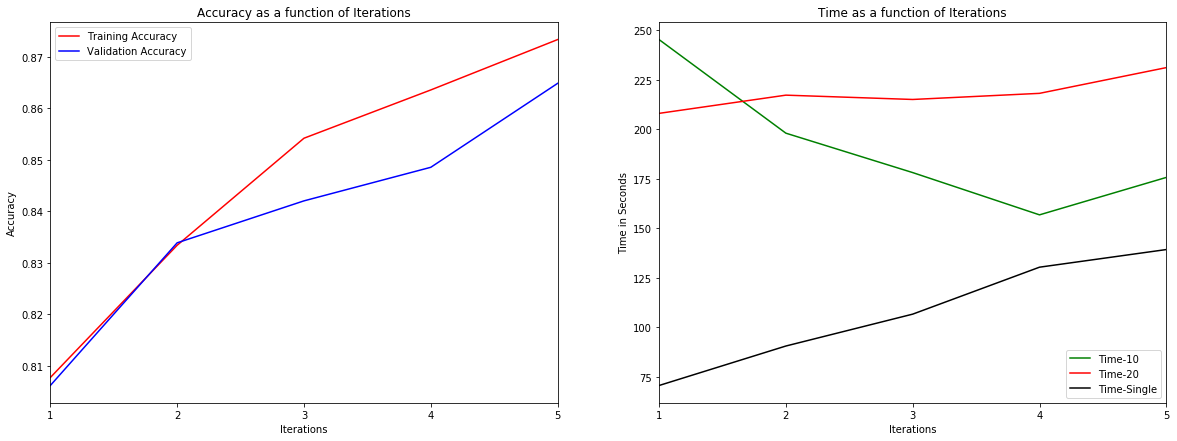

In [19]:
fig, axes = plt.subplots(1, 2,figsize=(20, 7), sharey=False)

ax = axes[0]
# Plot both accuracies 
ax.plot(iterations, accu_train, label="Training Accuracy", color="Red")
ax.plot(iterations, accu_val, label="Validation Accuracy", color="Blue")
# Ensure we have the correct scale for the iterations axis
ax.set_xlim([1, max_features])
ax.set_xticks(np.arange(1, max_features+1, 1), minor=False)

ax.set_xlabel('Iterations')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy as a function of Iterations')
ax.legend()

ax = axes[1]
# Plot the time
ax.plot(iterations, time_10, label="Time-10", color="Green")
ax.plot(iterations, time_20, label="Time-20", color="Red")
ax.plot(iterations, time_single, label="Time-Single", color="Black")
# Ensure we have the correct scale for the iterations axis
ax.set_xlim([1, max_features])
ax.set_xticks(np.arange(1, max_features+1, 1), minor=False)

ax.set_xlabel('Iterations')
ax.set_ylabel('Time in Seconds')
ax.set_title('Time as a function of Iterations')
ax.legend()

plt.show()